# Give Me Some Credit - Overview

## Problem Statement

From the Competition:
    
```
This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.
```


We're given a dataset that has already been split between a Training and Testing set. The dataset contains the following columns:

**SeriousDlqin2yrs** Person experienced 90 days past due delinquency or worse

**RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

**age**	Age of borrower in years

**NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

**DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income

**MonthlyIncome**: Monthly income

**NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)

**NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.

**NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit

**NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.

**NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

// describe how the submission is supposed to look like and how it is evaluated

# Give Me Some Credit - Model

## Examining the Training Set


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./data/cs-training.csv')

In [3]:
train.isnull().any()

Unnamed: 0                              False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                            True
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                       True
dtype: bool

In [4]:
train_serious_dlq_in_2_yrs_average = 0 #train["SeriousDlqin2yrs"].mean()
train_monthly_income_average = train["MonthlyIncome"].mean()
train_number_of_dependents_average = train["NumberOfDependents"].mean()

print(train_serious_dlq_in_2_yrs_average) # must be int, not decimal
print(train_monthly_income_average)
print(train_number_of_dependents_average)  # must be int, not decimal

## replace 'NA' values in train data with averges of the column
train = train.replace({'SeriousDlqin2yrs': np.nan }, train_serious_dlq_in_2_yrs_average)
train = train.replace({'MonthlyIncome': np.nan }, train_monthly_income_average)
train = train.replace({'NumberOfDependents': np.nan }, train_number_of_dependents_average)

train.isnull().any()


0
6670.221237392844
0.7572222678605657


Unnamed: 0                              False
SeriousDlqin2yrs                        False
RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

There are two columns with missing data, 'MonthlyIncome' and 'NumberOfDependents'.

## Train Model Omitting The Two Features With Missing Data

In [5]:
X_train = train.drop(['Unnamed: 0', "SeriousDlqin2yrs"],axis=1)

y_train = train['SeriousDlqin2yrs'].values

list(X_train.columns.values)

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

## Running On Testing Set and Saving Probabilities to CSV


In [6]:
test = pd.read_csv('./data/cs-test.csv')

test_serious_dlq_in_2_yrs_average = 0 #train["SeriousDlqin2yrs"].mean()
test_monthly_income_average = train["MonthlyIncome"].mean()
test_number_of_dependents_average = train["NumberOfDependents"].mean()

print(test_serious_dlq_in_2_yrs_average) # must be int, not decimal
print(test_monthly_income_average)
print(test_number_of_dependents_average)  # must be int, not decimal

## replace 'NA' values in train data with averges of the column
test = test.replace({'SeriousDlqin2yrs': np.nan }, test_serious_dlq_in_2_yrs_average)
test = test.replace({'MonthlyIncome': np.nan }, test_monthly_income_average)
test = test.replace({'NumberOfDependents': np.nan }, test_number_of_dependents_average)


test = test.drop(['Unnamed: 0', "SeriousDlqin2yrs"],axis=1)

test.isnull().any()

0
6670.221237392847
0.7572222678605657


RevolvingUtilizationOfUnsecuredLines    False
age                                     False
NumberOfTime30-59DaysPastDueNotWorse    False
DebtRatio                               False
MonthlyIncome                           False
NumberOfOpenCreditLinesAndLoans         False
NumberOfTimes90DaysLate                 False
NumberRealEstateLoansOrLines            False
NumberOfTime60-89DaysPastDueNotWorse    False
NumberOfDependents                      False
dtype: bool

In [7]:
def saveEntryFile(y__test, file_name): 
    import csv

    with open("./output/" + file_name, mode='w') as entry_file:
        entry_writer = csv.writer(entry_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
        entry_writer.writerow(['Id', 'Probability'])
        for i in range(0, len(y_test)):
            entry_writer.writerow([str(i+1), y__test[i][1]])

### Logistic Regression

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


regressor = LogisticRegression(solver='newton-cg')
regressor.fit(X_train, y_train)  

y_test = regressor.predict_proba(test)

saveEntryFile(y_test, "logistic_reg.csv")

#### Evaluate on Kaggle

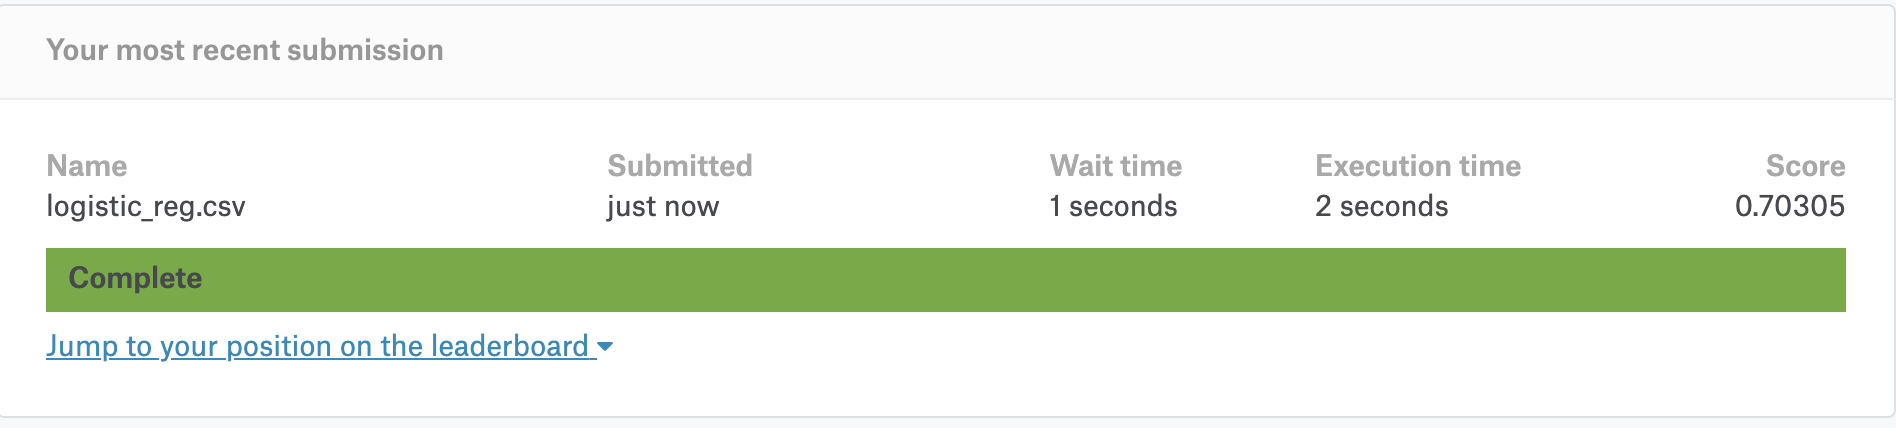

In [9]:
from IPython.display import Image
Image(filename='./images/KaggleSubmission_Logistic_Reg.png') 


### Using GaussianNB

In [10]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_test = clf.predict_proba(test)

saveEntryFile(y_test, "gaussian_nb.csv")

#### Evaluate on Kaggle

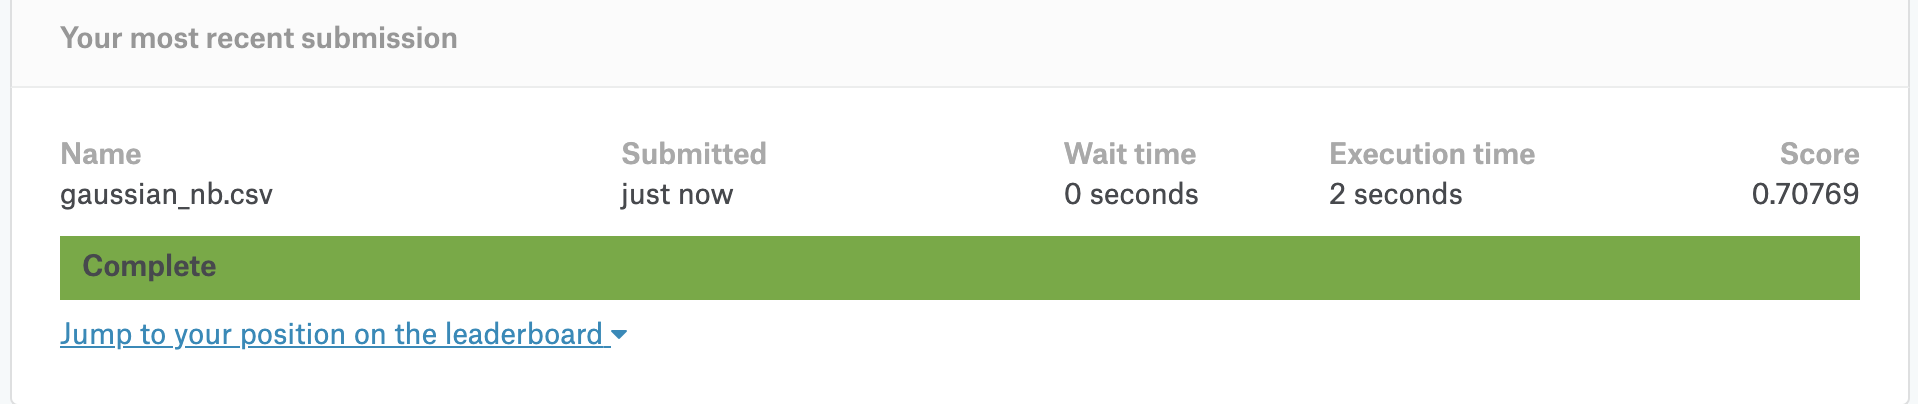

In [11]:
from IPython.display import Image
Image(filename='./images/KaggleSubmission_gaussian_nb.png') 


### Using RandomForest Classifier max_depth=2

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=2, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#             oob_score=False, random_state=0, verbose=0, warm_start=False)

print(clf.feature_importances_)
y_test = clf.predict_proba(test)


saveEntryFile(y_test, "randomForest.csv")


[1.76715264e-01 1.67374801e-02 1.45588644e-01 1.70698579e-03
 2.38840646e-03 1.31469790e-02 4.06896845e-01 7.90466279e-04
 2.35859212e-01 1.69717184e-04]


#### Evaluate on Kaggle

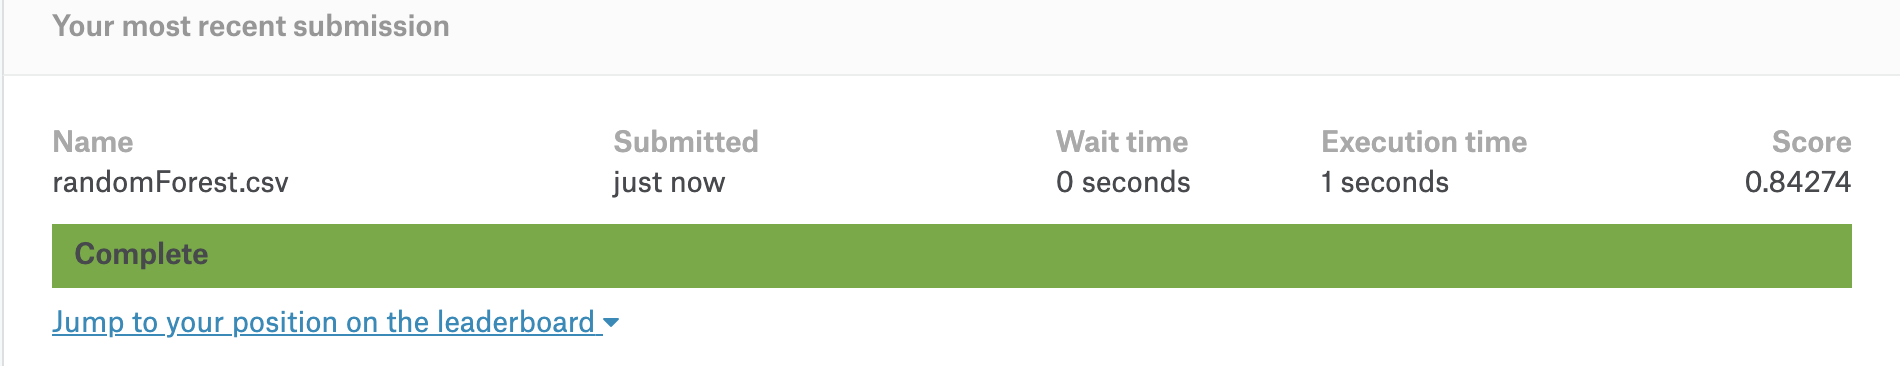

In [13]:
from IPython.display import Image
Image(filename='./images/KaggleSubmission_RandomForest.png') 


### Using RandomForest Classifier max_depth=10

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=0)
clf.fit(X_train, y_train)

print(clf.feature_importances_)
y_test = clf.predict_proba(test)


saveEntryFile(y_test, "randomForest_10_depth.csv")


[0.19509084 0.05450739 0.12402733 0.05855476 0.04802876 0.03937511
 0.30374667 0.01928536 0.14090212 0.01648166]


#### Evaluate on Kaggle

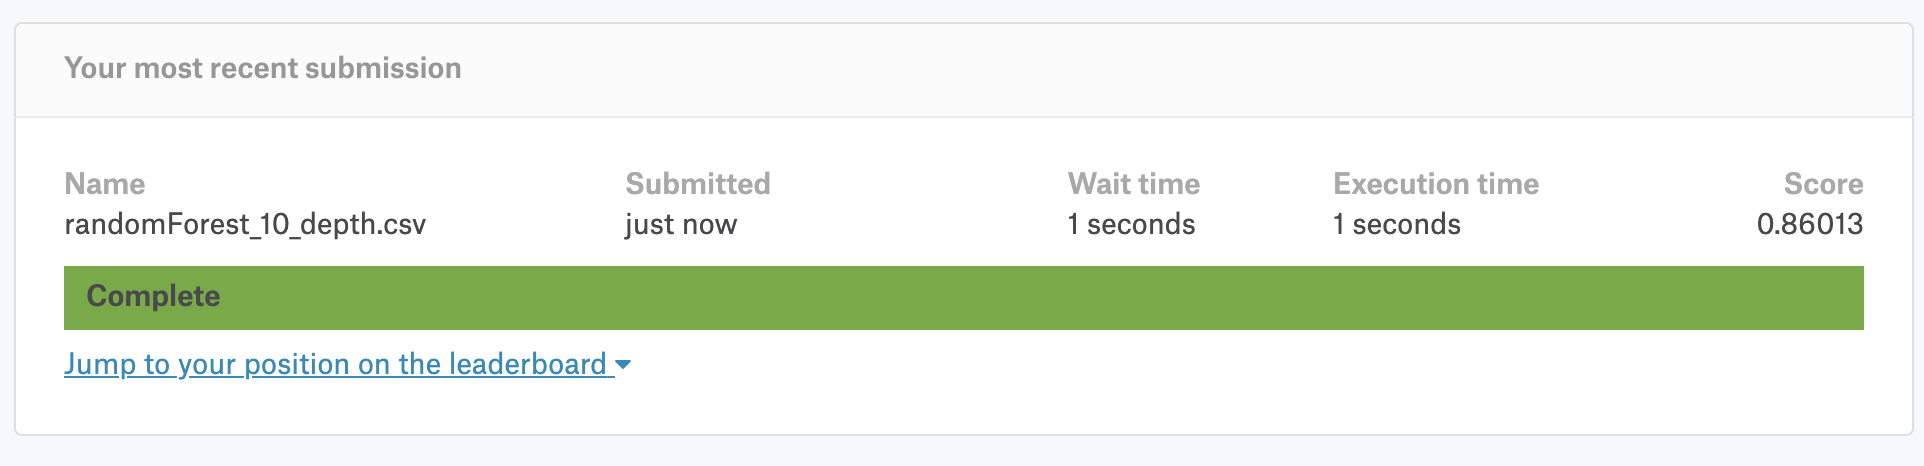

In [15]:
from IPython.display import Image
Image(filename='./images/KaggleSubmission_RandomForest_10_depth.png') 


## We got to the 530th place in the Kaggle competition 